In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
path = os.getcwd() + '/Data/Handwritten_Digit_Training_Data.csv'
data = pd.read_csv(path, header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data.shape

(450, 785)

In [4]:
cols = data.shape[1]
print("Columns = {}".format(cols))

Columns = 785


In [5]:
y=np.array(data.iloc[:,:1])
x=np.array(data.iloc[:,1:cols])

In [6]:
x.shape, y.shape

((450, 784), (450, 1))

In [7]:
np.unique(y)

array([0, 1, 2, 3], dtype=int64)

In [8]:
rows = x.shape[0]

In [9]:
x = np.insert(x,0,values=np.ones(rows),axis=1)
x.shape

(450, 785)

In [10]:
params = x.shape[1]
all_theta = np.zeros((4,params))
all_theta.shape

(4, 785)

In [11]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [12]:
print (sigmoid(0))
print (sigmoid(10))
print (sigmoid(100))

0.5
0.9999546021312976
1.0


In [13]:
def computeCost(theta, x, y):
    theta = np.matrix(theta)
    x = np.matrix(x)
    y = np.matrix(y)
    
    first = np.multiply(-y,np.log(sigmoid(x*theta.T)))
    second = np.multiply((1-y),np.log(1-sigmoid(x*theta.T)))
    cost = np.sum(first-second)
    cost = cost/(2*len(x))
    return cost

In [14]:
cost = computeCost(all_theta, x, y)
print("Error = {}".format(cost))

Error = 1.3862943611198904


In [15]:
learning_rate=1

def gradient(theta,x,y):
    theta = np.matrix(theta)
    x = np.matrix(x)
    y = np.matrix(y)
    error = sigmoid(x*theta.T)-y
    grad = (x.T*error)/(2*len(x))
    grad = grad*learning_rate
    return grad

In [16]:
from scipy.optimize import minimize

def one_vs_all(x, y, classes, new_theta):
    
    params = x.shape[1]
    rows = x.shape[0]
    
    for i in range(0, classes):
        theta = np.zeros(params)
        theta = new_theta[i,:]
        
        y_i = np.array([1 if label ==i else 0 for label in y])
        y_i = np.reshape(y_i, (rows, 1))
        
        fmin = minimize(fun=computeCost, x0=theta, args=(x, y_i), method='TNC', jac=gradient)
        
        all_theta[i,:] = fmin.x
        
    return all_theta

In [17]:
classes = 4
new_theta = one_vs_all(x, y, classes, all_theta)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys


In [18]:
computeCost(new_theta, x, y)

36.66940291522134

In [19]:
def predict_all(x,theta):
    x=np.matrix(x)
    theta=np.matrix(theta)
    
    h=sigmoid(x*theta.T)
    h_argmax=np.argmax(h,axis=1)
    
    return h_argmax

In [20]:
y_pred=predict_all(x, new_theta)
print(y_pred)

[[2]
 [1]
 [2]
 [2]
 [2]
 [3]
 [2]
 [0]
 [3]
 [3]
 [3]
 [0]
 [1]
 [2]
 [1]
 [0]
 [2]
 [1]
 [2]
 [0]
 [1]
 [1]
 [3]
 [3]
 [3]
 [0]
 [0]
 [3]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [3]
 [0]
 [2]
 [3]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [3]
 [2]
 [0]
 [2]
 [3]
 [2]
 [0]
 [0]
 [2]
 [1]
 [0]
 [3]
 [2]
 [0]
 [3]
 [2]
 [2]
 [3]
 [1]
 [2]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [2]
 [3]
 [0]
 [3]
 [0]
 [3]
 [0]
 [0]
 [1]
 [3]
 [2]
 [0]
 [1]
 [1]
 [2]
 [3]
 [0]
 [0]
 [0]
 [0]
 [0]
 [2]
 [3]
 [0]
 [0]
 [3]
 [1]
 [2]
 [0]
 [1]
 [3]
 [1]
 [0]
 [2]
 [2]
 [3]
 [2]
 [2]
 [3]
 [3]
 [1]
 [0]
 [1]
 [0]
 [1]
 [3]
 [1]
 [0]
 [2]
 [2]
 [0]
 [0]
 [0]
 [3]
 [0]
 [0]
 [0]
 [2]
 [0]
 [2]
 [3]
 [0]
 [1]
 [0]
 [3]
 [0]
 [3]
 [3]
 [1]
 [2]
 [3]
 [0]
 [2]
 [1]
 [1]
 [2]
 [1]
 [3]
 [3]
 [0]
 [3]
 [3]
 [1]
 [3]
 [1]
 [1]
 [2]
 [1]
 [3]
 [1]
 [2]
 [0]
 [0]
 [3]
 [1]
 [1]
 [1]
 [3]
 [1]
 [0]
 [3]
 [0]
 [2]
 [1]
 [1]
 [1]
 [2]
 [3]
 [2]
 [0]
 [0]
 [3]
 [0]
 [1]
 [2]
 [2]
 [0]
 [3]
 [3]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [2]
 [3]


In [21]:
correct = [1 if a==b else 0 for (a,b) in zip(y_pred,y)]
print(correct)
accuracy=(sum(map(int,correct))/float(len(correct)))
print("Accuracy = {}%".format(accuracy*100))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

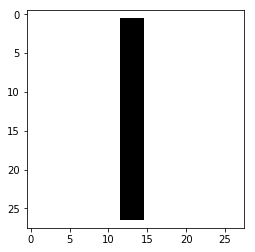

In [22]:
import matplotlib.image as mpimg

def rgb2gray(rgb):
    return np.dot(rgb[:,:,:3],[0.299,0.587,0.114])

img=mpimg.imread('Data/Test.png')
gray=rgb2gray(img)
plt.imshow(gray,cmap=plt.get_cmap('gray'))

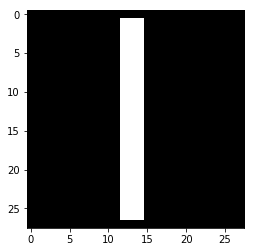

In [23]:
grarray=np.asarray(gray)
bw=(grarray<(grarray.mean()))*255
plt.imshow(np.reshape(bw,(28,28)),cmap=plt.cm.gray)

In [24]:
bw=bw.ravel()
bw=bw.reshape(1,-1)
brows=bw.shape[0]
bw=np.insert(bw,0,values=np.ones(brows),axis=1)

In [25]:
pred=predict_all(bw,new_theta)
if pred == [[0]]:
    digit = '0'
if pred == [[1]]:
    digit = '1'
if pred == [[2]]:
    digit = '2'
if pred == [[3]]:
    digit = '3'
print('The handwritten digit is', digit)

The handwritten digit is 1
